# Assignment 1
Retention is one of the most critical metrics for a company. Your task is to write a function that calculates player retention (day by day from the player's registration date). The function should be written in Python.
 The data is located in the 'shared' folder and has the following structure:
'shared/problem1-reg_data.csv' – registration time data
'shared/problem1-auth_data.csv' – user login time data

# Assignment 2
There are results from an A/B test in which different sets of promotional offers were presented to two groups of users. It is known that the ARPU (Average Revenue Per User) in the test group is 5% higher than in the control group. However, in the control group, 1928 out of 202103 players turned out to be paying, while in the test group, 1805 out of 202667 are paying.
Which set of offers can be considered the best? What metrics should be analyzed to make the right decision, and how?

# Assignment 3
In the game 'Plants & Gardens,' themed events are held every month, limited by time. In these events, players can obtain unique items for their garden and characters, additional coins, or bonuses. To receive a reward, players need to complete a series of levels within a specified time. What metrics can be used to evaluate the results of the last event?
Let's assume that in another event, we made the event mechanics more challenging so that with each unsuccessful attempt to complete a level, the player will regress several levels back. Will the set of evaluation metrics change? If yes, how?

© https://karpov.courses/analytics

In [1]:
# Loading libraries
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, chi2 
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import urlencode
import requests

# Import custom modules
import retention as rt
import visualisation as viz
import bootstrap as bs

# Default settings for plotting
sns.set(
    font_scale=1,
    style="whitegrid",
    rc={'figure.figsize':(20,10)}
        )

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# 1. - Retention Rate

## 1.1. Read 'problem1-reg_data.csv' and 'problem1-auth_data.csv'

In [2]:
# Paths for 'problem1-reg_data.csv' and 'problem1-auth_data.csv'
reg_data_path = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-vinnik-40/shared/problem1-reg_data.csv'
auth_data_path = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-vinnik-40/shared/problem1-auth_data.csv'

In [3]:
# Read 'problem1-reg_data.csv'
reg_data = pd.read_csv(reg_data_path, sep=';')

In [4]:
# Convert reg_ts to datetime format
reg_data['reg_ts'] = pd.to_datetime(reg_data['reg_ts'], unit='s')

In [5]:
# Read 'problem1-auth_data.csv'
auth_data = pd.read_csv(auth_data_path, sep=';')

In [6]:
# Convert reg_ts to datetime format
auth_data['auth_ts'] = pd.to_datetime(auth_data['auth_ts'], unit='s')

## 1.2. Exploratory Data Analysis

In [7]:
# Browse reg_data top 5 rows
reg_data.head()

,reg_ts,uid
0,1998-11-18 09:43:43,1
1,1999-07-22 22:38:09,2
2,2000-01-13 22:27:27,3
3,2000-05-28 14:19:01,4
4,2000-09-16 11:21:53,5


In [8]:
# Print min and max dates for reg_data
print(f'Time period for reg_data: {reg_data.reg_ts.min()} - {reg_data.reg_ts.max()}')

Time period for reg_data: 1998-11-18 09:43:43 - 2020-09-23 15:17:24


In [9]:
# Information regarding reg_data
reg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   reg_ts  1000000 non-null  datetime64[ns]
 1   uid     1000000 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 15.3 MB


In [10]:
# Number of unique uid in reg_data
reg_data.uid.nunique()

1000000

In [11]:
# Duplicated rows by uid in reg_data
reg_data[reg_data.duplicated(subset='uid')]

,reg_ts,uid


In [12]:
# Number of duplicated rows by uid in reg_data
reg_data.duplicated(subset='uid').sum()

0

In [13]:
# Browse auth_data top 5 rows
auth_data.head()

,auth_ts,uid
0,1998-11-18 09:43:43,1
1,1999-07-22 22:38:09,2
2,1999-07-25 16:46:46,2
3,1999-07-31 03:50:15,2
4,1999-08-05 17:49:39,2


In [14]:
# Print min and max dates for auth_data
print(f'Time period for auth_data: {auth_data.auth_ts.min()} - {auth_data.auth_ts.max()}')

Time period for auth_data: 1998-11-18 09:43:43 - 2020-09-23 15:17:24


In [15]:
# Information regarding reg_data
auth_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9601013 entries, 0 to 9601012
Data columns (total 2 columns):
 #   Column   Dtype         
---  ------   -----         
 0   auth_ts  datetime64[ns]
 1   uid      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 146.5 MB


In [16]:
# Missed values in auth_data
auth_data.isna().sum()

auth_ts    0
uid        0
dtype: int64

## 1.3. Calulate Retention Rate

To become familiar with the documentation, please utilize standard Python command. For instance - 
??rt.cohort_retention

## 1.3.1. Monthly Classic Cohort Retention Rate

In [17]:
# Calulate retention
month_retention_df = rt.cohort_retention(reg_data, auth_data, '2019-06-01', '2019-12-31', 'month', 12, 'classic')

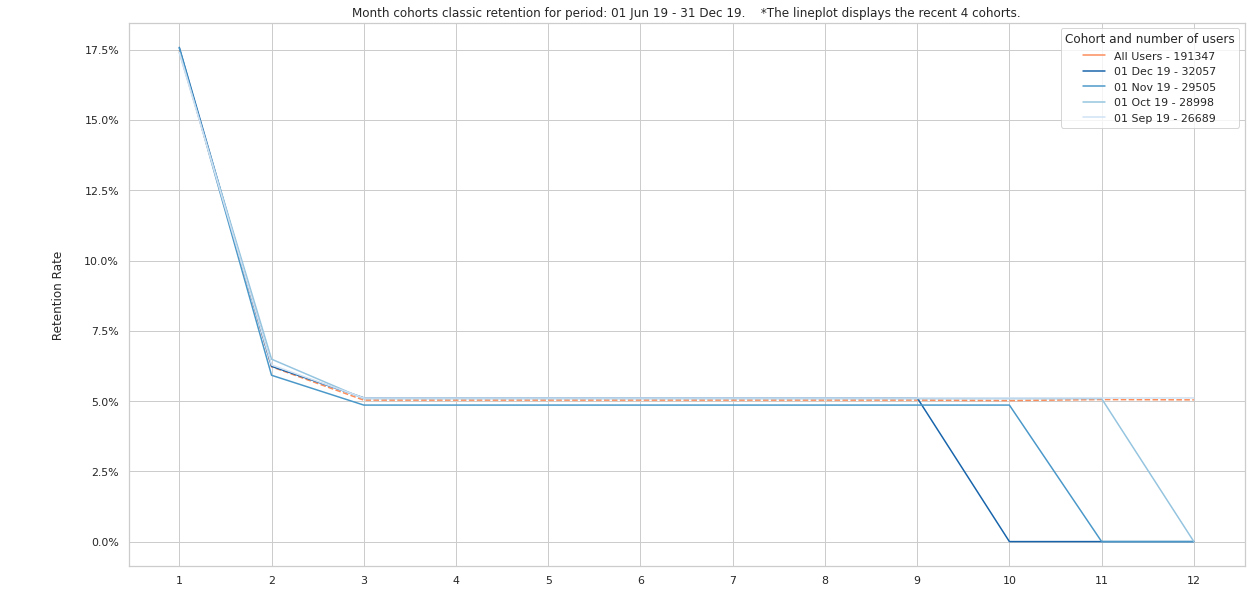

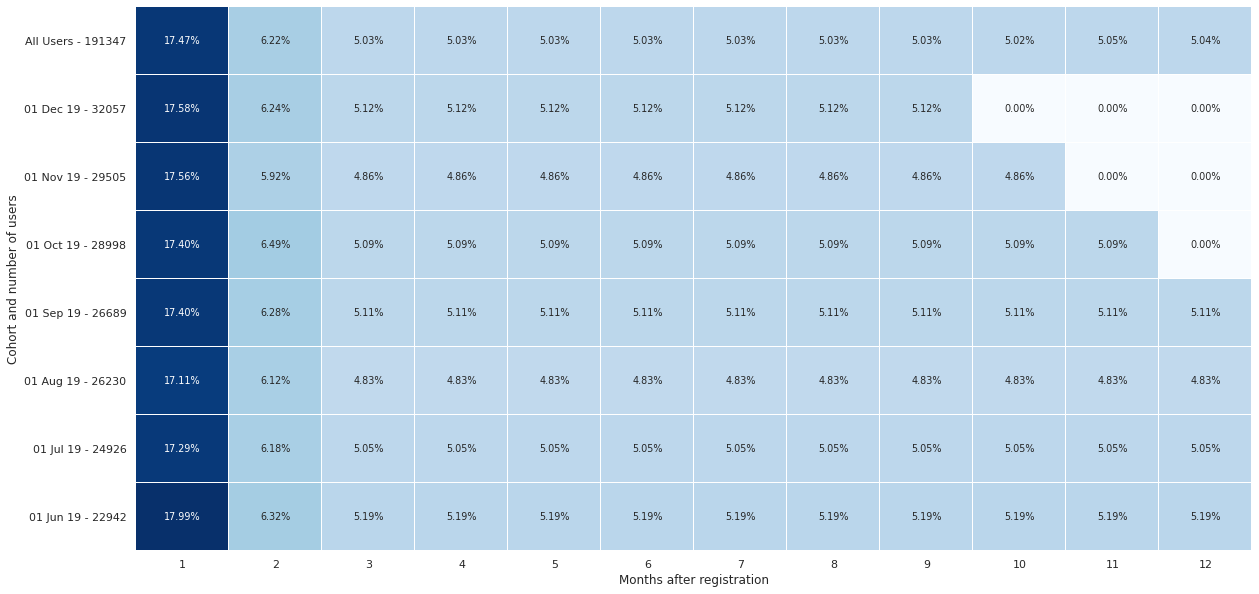

In [18]:
# Visualize calulated retention rate
viz.retention_plot(month_retention_df, 4)

## 1.3.2. Weekly Classic Cohort Retention Rate

In [19]:
# Calulate retention
week_retention_df = rt.cohort_retention(reg_data, auth_data, '2020-01-06', '2020-03-08', 'week', 15, 'classic')

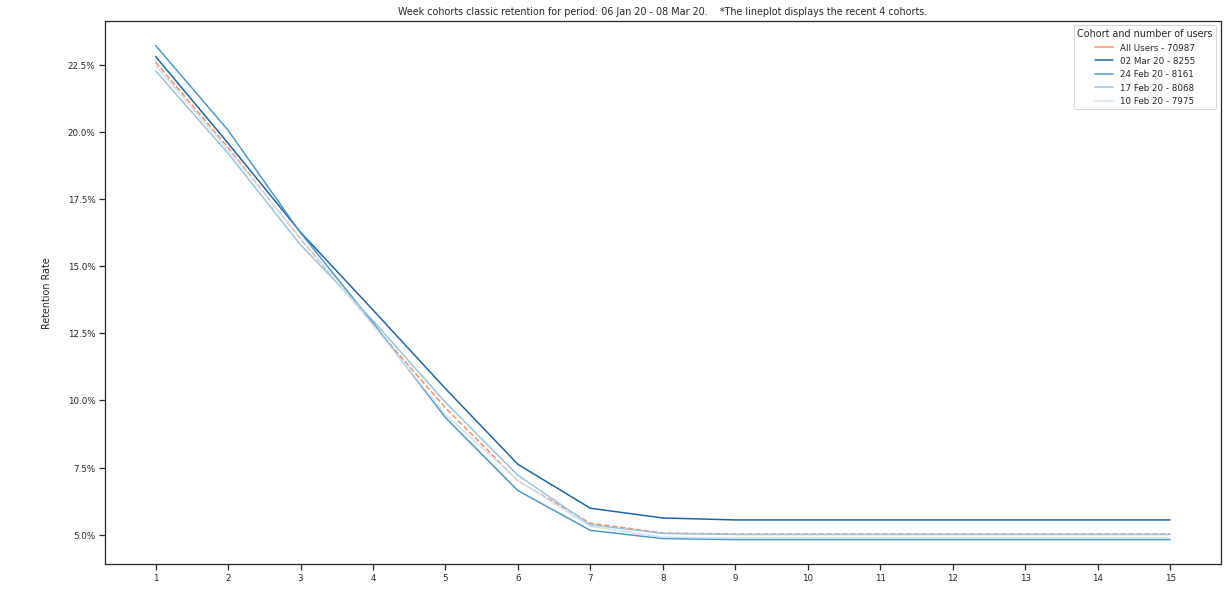

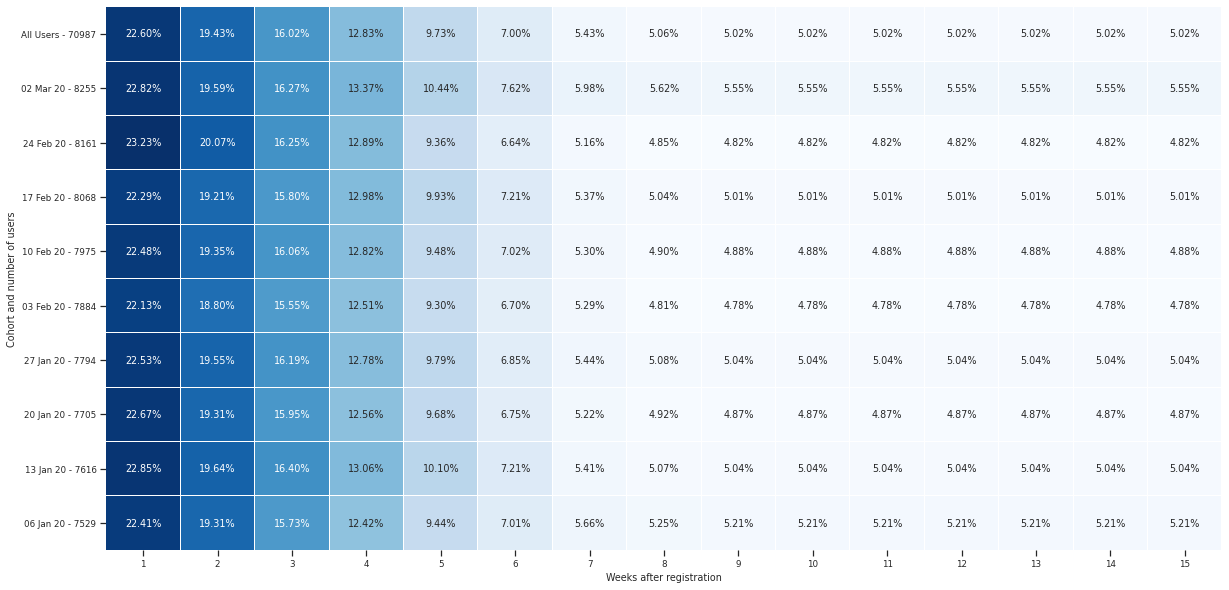

In [20]:
# Visualize calulated retention rate
viz.retention_plot(week_retention_df, 4)

## 1.3.3. Daily Rolling Cohort Retention Rate

In [21]:
# Calulate retention
day_retention_df = rt.cohort_retention(reg_data, auth_data, '2020-07-01', '2020-07-21', 'day', 15, 'rolling')

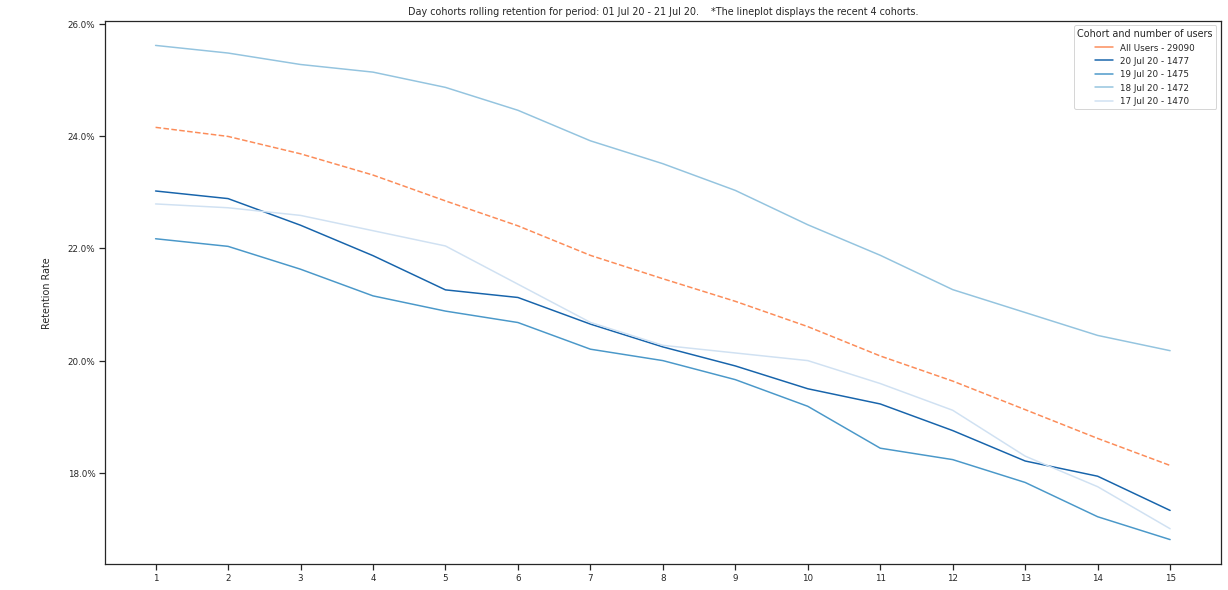

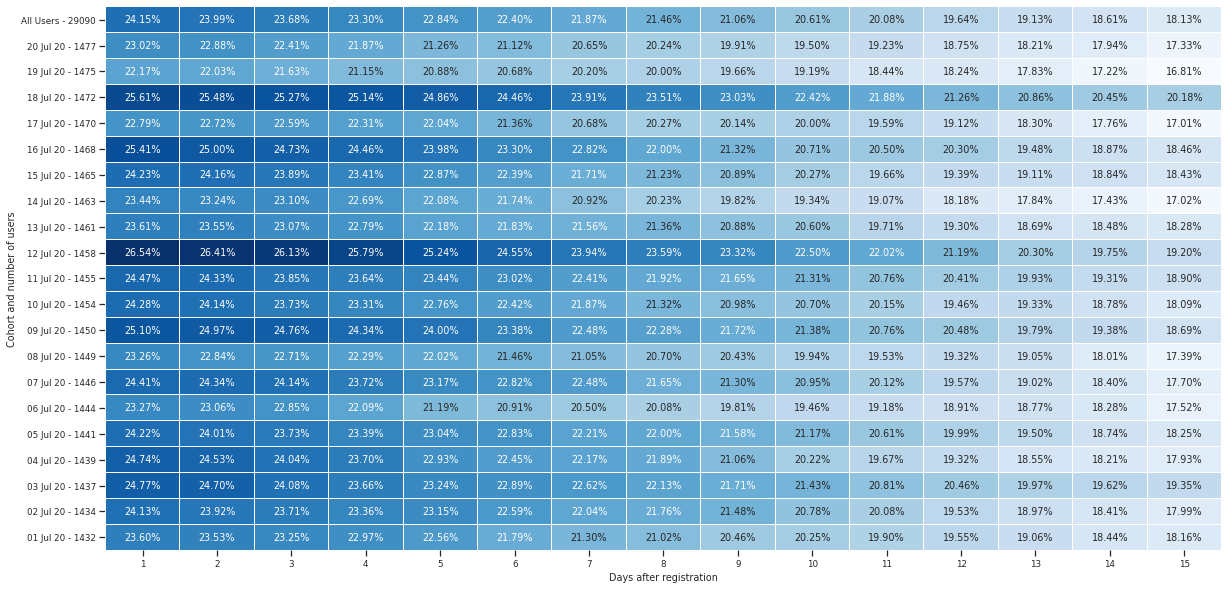

In [22]:
# Visualize calulated retention rate
viz.retention_plot(day_retention_df, 4)

# 2. Event A/B test results analysis

## 2.1. Read A/B test results

In [23]:
# Calculate url for 'Проект_1_Задание_2.csv'
ab_test_data_url = 'https://disk.yandex.ru/d/SOkIsD5A8xlI7Q'
endpoint = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
final_url = endpoint + urlencode(dict(public_key=ab_test_data_url))
response = requests.get(final_url)
download_url = response.json()['href']

In [24]:
# Read 'Проект_1_Задание_2.csv'
ab_test_data = pd.read_csv(download_url, sep=';')

## 2.2. Exploratory data analysis

In [25]:
# First 5 ab_test_data records
ab_test_data.head(5)

,user_id,revenue,testgroup
0,1,0,b
1,2,0,a
2,3,0,a
3,4,0,b
4,5,0,b


In [26]:
# Missing values and columns datatypes
ab_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404770 entries, 0 to 404769
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    404770 non-null  int64 
 1   revenue    404770 non-null  int64 
 2   testgroup  404770 non-null  object
dtypes: int64(2), object(1)
memory usage: 9.3+ MB


In [27]:
# Unique groups
print(ab_test_data.testgroup.unique())

['b' 'a']


In [28]:
# Number of duplicated user_id by group
ab_test_data.groupby('testgroup')['user_id'].apply(lambda x: x.duplicated().sum())

testgroup
a    0
b    0
Name: user_id, dtype: int64

## 2.3. Preliminary data analysis

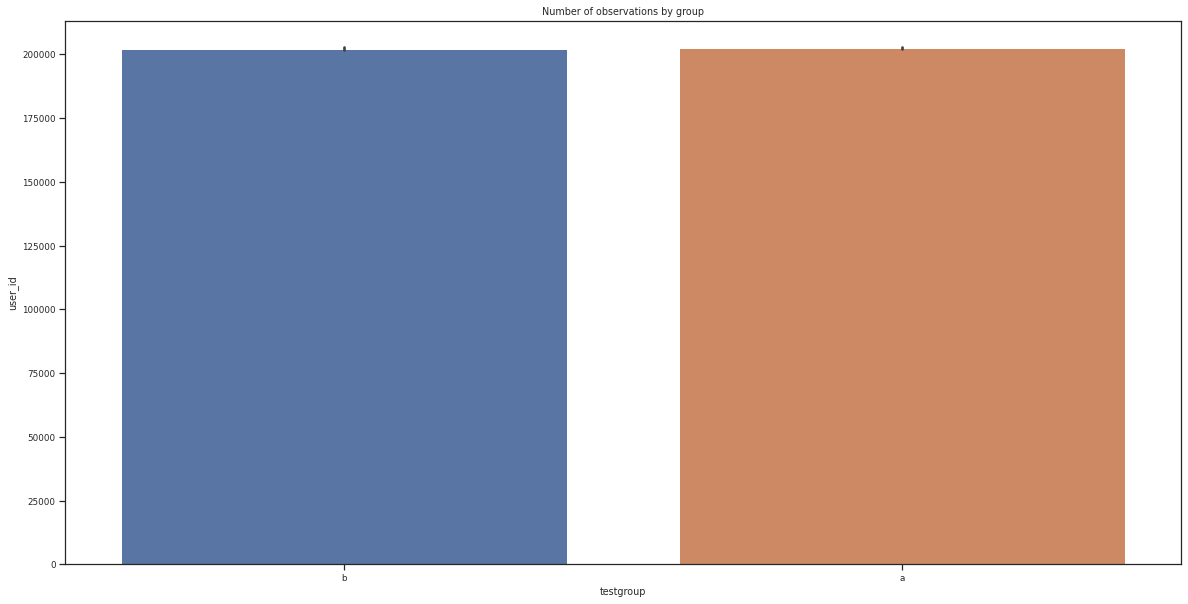

In [29]:
# Number of observations by group
sns.barplot(data=ab_test_data, x='testgroup', y='user_id')
plt.title('Number of observations by group')
plt.show()

In [30]:
# Groups intersection by user_id
group_a_users = set(ab_test_data[ab_test_data['testgroup'] == 'a']['user_id'])
group_b_users = set(ab_test_data[ab_test_data['testgroup'] == 'b']['user_id'])

# Check for common users in both groups
common_users = group_a_users.intersection(group_b_users)

if len(common_users) > 0:
    print("Number of common users found in both groups:", common_users)
else:
    print("No common users found.")

No common users found.


### 2.3.1. Distribution of the revenue across groups

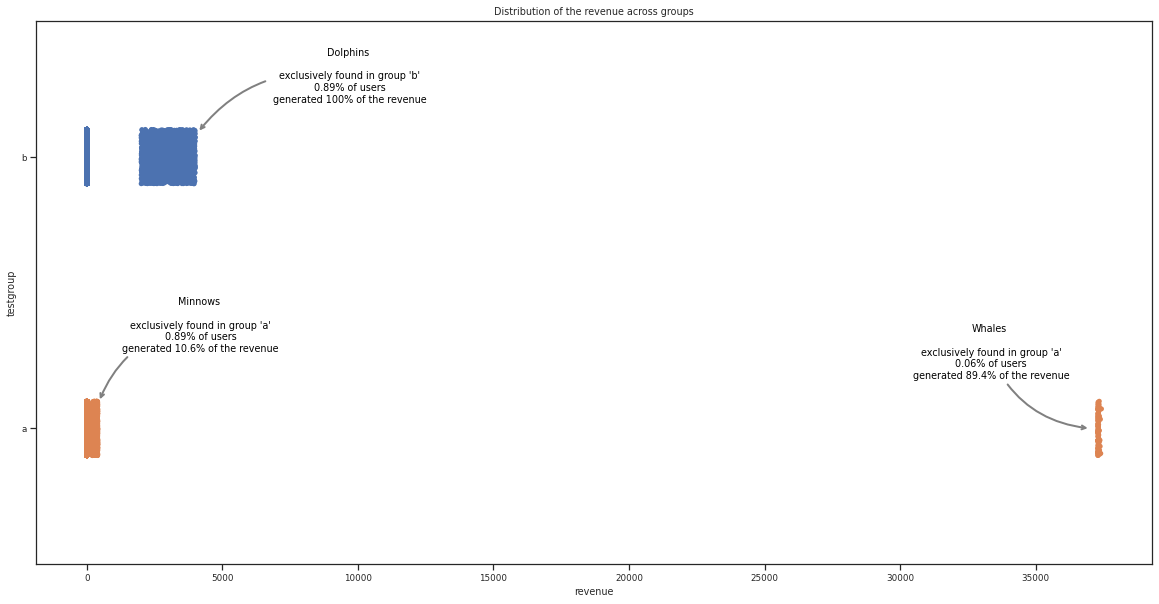

In [31]:
# Distribution of the revenue across groups
ax = sns.stripplot(data=ab_test_data, x="revenue", y="testgroup")
plt.title('Distribution of the revenue across groups')
# Define annotations
annotations = [("Whales\n\n exclusively found in group 'a'\n 0.06% of users\n generated 89.4% of the revenue",
                 (37000, 1), (-100, 50), 'black'),
               ("Dolphins\n\n exclusively found in group 'b'\n 0.89% of users\n generated 100% of the revenue",
                 (4100, -0.09), (150, 30), 'black'),
               ("Minnows\n\n exclusively found in group 'a'\n 0.89% of users\n generated 10.6% of the revenue",
                 (450, 0.9), (100, 50), 'black')]
# Plot annotations
for annotation in annotations: viz.annotate_arrow(ax, *annotation)
plt.show()

The chart illustrates a significant shift in player spending profiles:

    a. Players have converted to being either Whales or Minnows, with no presence of Dolphins.
    b. Players have converted to being Dolphins, with no Whales or Minnows remaining.
    
### 2.3.2. A detailed segmentation sheet for further analysis can be found below

In [32]:
# Assign segments to users depending on revenue
bins = [-1, 0, 1000, 5000, 40000]
labels = ['Freeloaders', 'Minnows', 'Dolphins', 'Whales']
ab_test_data['segment'] = pd.cut(ab_test_data['revenue'], bins=bins, labels=labels)

In [33]:
# Group users by segment
ab_test_data_by_user_segment = ab_test_data.groupby(['segment', 'testgroup'])\
                               .agg({'user_id' : 'count', 
                                     'revenue' : 'sum'})\
                               .rename(columns={'user_id' : 'count_user_id'})\
                               .reset_index()

ab_test_data_by_user_segment['ARPU']  = (ab_test_data_by_user_segment['revenue']
                                         /ab_test_data_by_user_segment['count_user_id'])

# Fill missing values in the 'total_segment_revenue' and 'ARPU_by_segment'
ab_test_data_by_user_segment['revenue'] = ab_test_data_by_user_segment['revenue'].fillna(0)
ab_test_data_by_user_segment['ARPU']    = ab_test_data_by_user_segment['ARPU'].fillna(0)


In [34]:
# Calculate the total count_user_id and total total_segment_revenue for each testgroup
total_users_by_group   = ab_test_data_by_user_segment\
                         .groupby('testgroup')['count_user_id']\
                         .transform('sum')

total_revenue_by_group = ab_test_data_by_user_segment\
                         .groupby('testgroup')['revenue']\
                         .transform('sum')

# Calculate the percentage of total for count_user_id and total_segment_revenue
ab_test_data_by_user_segment['user_percentage']    = (ab_test_data_by_user_segment['count_user_id'] 
                                                      / total_users_by_group)

ab_test_data_by_user_segment['revenue_percentage'] = (ab_test_data_by_user_segment['revenue'] 
                                                      / total_revenue_by_group)

# Format the columns
ab_test_data_by_user_segment.style.format({'count_user_id'      : '{:,.0f}',
                                           'revenue'            : '{:,.0f}',
                                           'ARPU'               : '{:,.0f}',
                                           'user_percentage'    : '{:.2%}',
                                           'revenue_percentage' : '{:.1%}'})

,segment,testgroup,count_user_id,revenue,ARPU,user_percentage,revenue_percentage
0,Freeloaders,a,"200,175",0,0,99.05%,0.0%
1,Freeloaders,b,"200,862",0,0,99.11%,0.0%
2,Minnows,a,"1,805","545,937",302,0.89%,10.6%
3,Minnows,b,0,0,0,0.00%,0.0%
4,Dolphins,a,0,0,0,0.00%,0.0%
5,Dolphins,b,"1,805","5,421,603","3,004",0.89%,100.0%
6,Whales,a,123,"4,590,252","37,319",0.06%,89.4%
7,Whales,b,0,0,0,0.00%,0.0%


### 2.3.3. Asumption.

The traffic splitting system has been double-checked.
Group 'a' and 'b' have had an equal number of users from each segment before the A/B test implementation.

So, there are no issues with the A/B test design.
Groups 'a' and 'b' had been stratified according to revenue segment.

## 2.4. Metrics

Establish the target metrics that need to show improvement to conclude the effectiveness of the new offerings:

Metrics:

    - ARPU  = total revenue      / count users
    - ARPPU = total revenue      / count paying users
    - CR    = count paying users / count users

## 2.5. Hypothesis test

It is not possible to conduct tests for the normality and equality of variances of ARPU, ARPPU, and CR distributions using the 'ab_test_data.csv' dataset. This limitation arises because the dataset contains the total revenue for each user, making it impossible to derive distributions for these metrics.

#### 2.5.1.1. ARPU, ARPPU, and CR.

Hypothesis testing for the equality of means in ARPU, ARPPU, and CR will be carried out using the Poisson bootstrap method with 10,000 samples.


#### 2.5.1.2. Supplementary Chi-Square Test for CR

Additionally, a Pearson's chi-square test will be conducted for CR.

### 2.5.1. Initialize parameters

In [35]:
# Number of samples -  10,000 is the industry best practice
B = 10000

Alpha - significance level.
Represents the probability of making a Type I error, 
which is the error of incorrectly rejecting a null hypothesis when it is, in fact, true.

If the confidence interval for the difference in KPI intersects with 0, 
then the difference is not statistically significant and there is no basis to reject the null hypothesis.

In [36]:
# Initialize alpha
alpha = 0.05

### 2.5.2. Perform Poisson bootstrap

In [37]:
# Perform Poisson bootstrap
poisson_bootstrap_result_df  = bs.poisson_bootstrap(ab_test_data, B)

## 2.6. Poisson bootstrap result analysis

### 2.6.1. ARPU

    H0 (null hypothesis) - The ARPU is the same for group 'a' and 'b'.
    H1 (alternative hypothesis) - In the group 'b', the ARPU has increased.

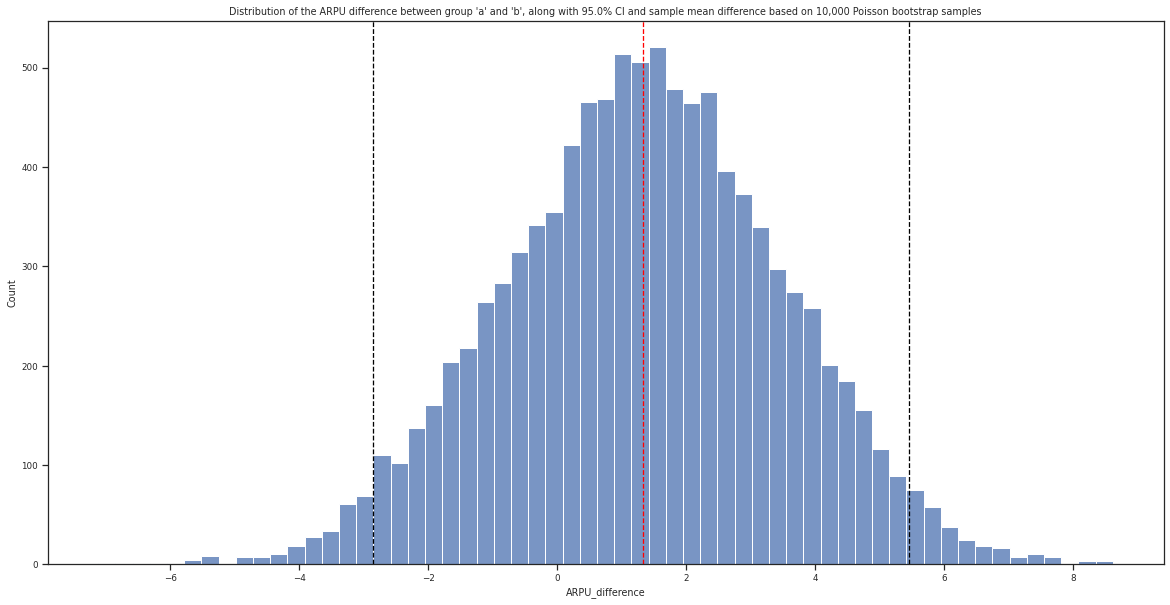

In [38]:
viz.plot_bootstrap_result(poisson_bootstrap_result_df.ARPU_difference, B, alpha)

In [39]:
# Poisson bootstrap result
bs.bootstrap_result_check(poisson_bootstrap_result_df.ARPU_difference, alpha)

Sample mean difference: 1.333
95.0% Confidence Interval (-2.853, 5.447)
0 belongs to the 95.0% confidence interval. There is no basis to reject H0.


#### 2.6.1.1. ARPU. Conclusion

The ARPU change is not statistically significant; the new offerings bucket does not increase ARPU, or the ARPU increase is less than the Minimum Detectable Effect (MDE).

### 2.6.2. ARPPU

    H0 (null hypothesis) - There is no ARPPU difference between group 'a' and 'b'.
    H1 (alternative hypothesis) - In the group 'b', the ARPPU has increased.

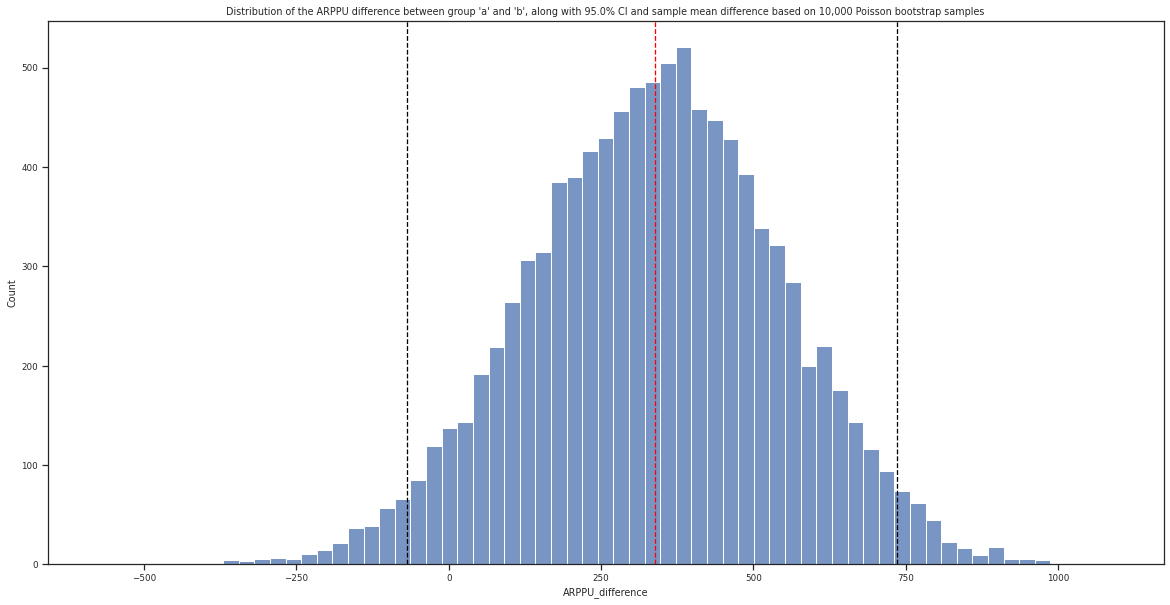

In [40]:
viz.plot_bootstrap_result(poisson_bootstrap_result_df.ARPPU_difference, B, alpha)

In [41]:
# Poisson bootstrap result
bs.bootstrap_result_check(poisson_bootstrap_result_df.ARPPU_difference, alpha)

Sample mean difference: 338.447
95.0% Confidence Interval (-68.644, 736.161)
0 belongs to the 95.0% confidence interval. There is no basis to reject H0.


#### 2.6.2.1. ARPPU. Conclusion

The ARPPU increase is not statistically significant; the new offerings bucket does not increase ARPPU, or the ARPPU increase is less than the Minimum Detectable Effect (MDE).

### 2.6.3. CR

#### 2.6.3.1. CR - Poisson bootstrap

    H0 (null hypothesis) - There is no CR difference between group 'a' and 'b'.
    H1 (alternative hypothesis) - In the group 'b', the CR has increased.

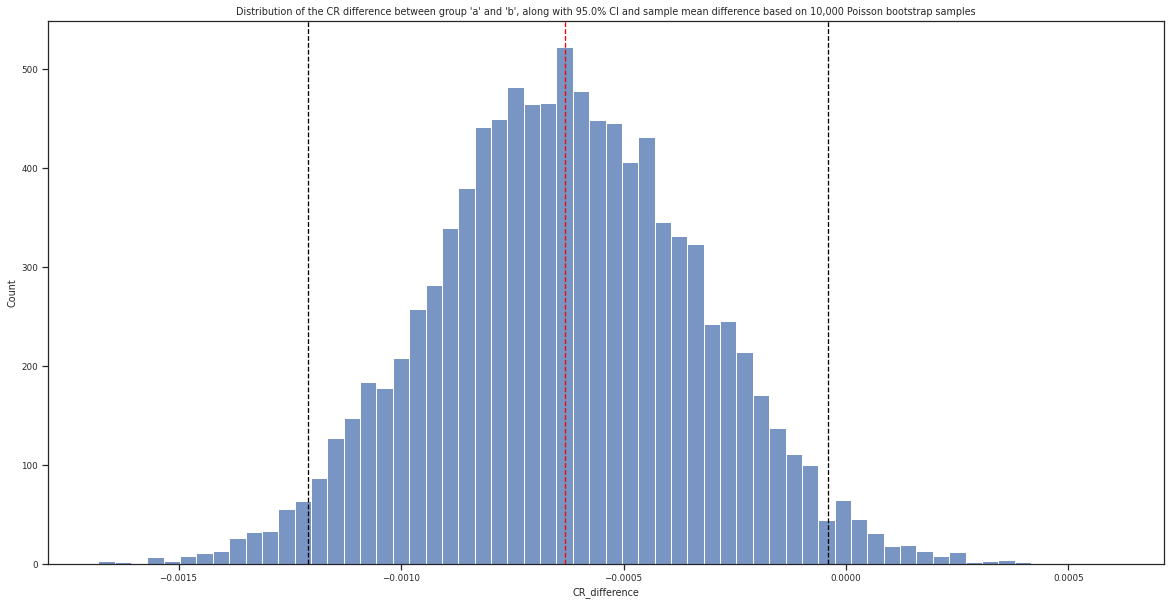

In [42]:
viz.plot_bootstrap_result(poisson_bootstrap_result_df.CR_difference, B, alpha)

In [43]:
# Poisson bootstrap result
bs.bootstrap_result_check(poisson_bootstrap_result_df.CR_difference, alpha)

Sample mean difference: -0.001
95.0% Confidence Interval (-0.001, -0.000)
0 does not belong to the 95.0% confidence interval. Rejecting H0.


#### 2.6.3.3. CR. Conclusion

The CR decrease is statistically significant; the new offerings bucket statistically significant decrease CR.

### 2.7. A/B Test Summary

#### 2.7.1. A/B Test Results:

    ARPU  - The increase in ARPU is not statistically significant:
                Sample mean difference: 1.38
                95.0% Confidence Interval (-3.05, 5.72)
                
    ARPPU - The increase in ARPPU is not statistically significant:
                Sample mean difference: 343.85
                95.0% Confidence Interval (-84.52, 747.98)
                
    CR    - The decrease in CR is statistically significant:
                Sample mean difference: -0.001
                95.0% Confidence Interval (-0.001, -0.000)
                
#### 2.7.2. Player Segments Analysis:

The new offerings bundle has led to a significant shift in player spending profiles:

    a. Players have transitioned to being either Whales or Minnows, with no presence of Dolphins:
          123 Whales  (0.06% of group users) generate  89.4% of revenue - 4,590,252 with an ARPPU 37,319		
        1,805 Minnows (0.89% of group users) generate  10.6% of revenue -   545,937 with an ARPPU    302
        
    b. Players have shifted to being Dolphins, with no Whales or Minnows remaining:
        1,805 Dolhins (0.89% of group users) generate 100.0% of revenue - 5,421,603 with an ARPPU  3,004		

#### 2.7.3. Summary

The design of the new offerings has to be discussed with the game designer, considering the insights from the A/B test results. This will provide a more profound understanding of the objectives of these new offerings.

Despite the slight and statistically insignificant increase in ARPU attributed to the new offerings, it's crucial to recognize that the long-term absence of Whales may potentially lead to revenue losses. This consideration is especially important given that Whales have no revenue limits.

Rolling out these new offerings to all players without a detailed examination of the implemented changes and the intended goals is not recommended.

# 3. Event Assessment Metrics

## 3.1. By incorporating these metrics, game designer can comprehensively evaluate the impact of themed events, whether the events are challenging or more forgiving and adjust event design based on player behavior and preferences.

### 3.1.1. Attendance: 
    The number of players who participated in the event.
### 3.1.2. Registration Rate:
    The percentage of people who registered for the event compared to the total number of invitations or promotions sent. It reflects the event's ability to attract participants.
### 3.1.3. Completion Rate:
    The percentage of players who successfully completed all required levels to earn rewards.
### 3.1.4. Engagement:
    Measures of player interaction within the event, such as time spent, levels attempted, and interactions with in-game items or characters.
### 3.1.5. Customer Satisfaction (CSAT): 
    Surveys or feedback mechanisms are used to collect participant opinions and ratings regarding the event's quality, content, and organization.
### 3.1.6. Reward Redemption:
    The number of unique items, coins, or bonuses redeemed by players as event rewards.
### 3.1.7. Conversion Rate:
    If the event is designed to encourage in-game purchases, this metric measures the percentage of players who made purchases during the event.
### 3.1.8. Churn Rate:
    The rate at which players drop out of the event before completing it.
### 3.1.9. Retention:
    The percentage of players who return for subsequent themed events or continue playing the game after the event.
### 3.1.10. Revenue:
    The total revenue generated from in-game purchases during the event.
### 3.1.11. Player Feedback:
    Gather player feedback and reviews about the event's difficulty, rewards, and overall enjoyment.
### 3.1.12. Social Sharing: 
    Track mentions, shares, or user-generated content related to the event on social media platforms.
### 3.1.13. Level Progression:
    Measure how far players progress through the event's levels and if there are any bottlenecks or difficulty spikes.


## 3.2.     If the event mechanics become more challenging, causing players to regress several levels with each unsuccessful attempt, consider these additional metrics:

### 3.2.1. Level Regression Rate: 
    The rate at which players regress to previous levels due to unsuccessful attempts.
### 3.2.2. Frustration Metrics:
    Metrics related to player frustration, such as the number of retries, rage quits, or support requests during the event.
### 3.2.3. Recovery Rate:
    How quickly players recover and progress to higher levels after regressing.
### 3.2.4. Level Abandonment:
    Measure the point at which players are most likely to abandon the event due to increased difficulty.
### 3.2.5. Event Completion Time:
    Assess whether the average time it takes to complete the event increases with the new challenging mechanics.